# NYC CITI BIKES ANALYSIS

- Joseph Boateng  
- Emmanuella Adu  
- Akosua Gyamfua Kena-Asare  
- Gloria Livingstream  
- Eric Ackon

# OBJECTIVES  
- Analyze trip durations, start and end times, and frequency of usage  
- Identify seasonal and weekly trends  
- Analyze user demographics  
- Analyze distribution between one-time users and subscribers  
- Identify most frequently used stations and prospect new bike stations

# BACKGROUND AND OVERVIEW
 Citi Bike is New York City's official bike share program, which serves as an alternative to taxis, buses and subways.  
 Citi Bike offers the most accessible, affordable and convenient ways to explore NYC.  
 This project involves analyzing data from a race bike hiring company.    
 The data set was sourced from the company's website and imported into Jupyter Notebook for inspection, preprocessing and analysis.  
 The data contains information on the bike id, duration of trips, user demographics and date-time metrics for each trip.  
 The different columns present in the data set are displayed below with their descriptions:  
 ```Start Time``` : Date and time the trip begun  
 ```Stop Time```  : Date and time the trip ended  
 ```Start Station ID``` : The station ID where the trip begun  
 ```Start Station Name``` : The name of the station where the trip begun  
 ```End Station ID``` : The station ID where the trip ended  
 ```End Station Name``` : The name of the station where the trip ended  
 ```Bike ID``` : The ID number of the bike used for the trip  
 ```User Type``` : Shows whether a user is subscribed to the service or is a one-time-user  
 ```Birth Year``` : The birth year of the user  
 ```Age``` : The user's age  
 ```Age Groups``` : The age categories for users  
 ```Trip Duration``` : Total duration for trip  
 ```Trip_Duration_in_min``` : Trip duration in minutes  
 ```Month``` : The month in which the trip was taken  
 ```Season``` : The season in which the trip was taken  
 ```Temperature``` : The temperature recorded at the time of the trip  
 ```Weekday``` : The day of the week in which the trip was taken
 

# DATA UNDERSTANDING
Import numpy and pandas to assess the qualities and perform necessary cleaning and manipulations on data.  
Checks for missing values, duplicates, inconsistent values and data types are performed at this stage.  
This step makes the data understandable and guides insight development.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing the Dataset
bikes = pd.read_excel('HIRING RACING BIKES.xlsx')
bikes

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,2017-03-31 21:06:00,2017-03-31 21:10:00,3186,Grove St PATH,3203,Hamilton Park,24608,Subscriber,1968,53,45-54,244,4,3,Spring,18,Friday
20396,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
20397,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
20398,2017-03-31 21:26:00,2017-03-31 21:30:00,3195,Sip Ave,3201,Dey St,29276,Subscriber,1970,51,45-54,239,4,3,Spring,18,Friday


In [3]:
# Summary of the data
bikes.describe()

,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Month,Temperature
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,3215.863627,3211.439510,25301.732647,1979.319706,41.680294,563.842745,9.398775,2.221569,14.897647
std,34.563120,82.707121,989.974295,10.091335,10.091335,4011.550663,66.858684,0.822335,2.398100
min,3183.000000,152.000000,15084.000000,1931.000000,22.000000,61.000000,1.000000,1.000000,9.000000
25%,3186.000000,3186.000000,24523.000000,1974.000000,35.000000,221.000000,4.000000,1.000000,13.000000
50%,3203.000000,3202.000000,24679.000000,1982.000000,39.000000,311.000000,5.000000,2.000000,15.000000
75%,3267.000000,3220.000000,26220.000000,1986.000000,47.000000,514.000000,9.000000,3.000000,17.000000
max,3281.000000,3442.000000,29296.000000,1999.000000,90.000000,390893.000000,6515.000000,3.000000,19.000000


In [4]:
#Viewing the first 10 rows of the data
bikes.head(10)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday
5,2017-01-01 02:22:00,2017-01-01 02:31:00,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
6,2017-01-01 02:23:00,2017-01-01 02:27:00,3186,Grove St PATH,3203,Hamilton Park,24512,Subscriber,1984,37,35-44,224,4,1,Winter,10,Sunday
7,2017-01-01 03:24:00,2017-01-01 03:26:00,3186,Grove St PATH,3213,Van Vorst Park,24513,Subscriber,1985,36,35-44,148,2,1,Winter,10,Sunday
8,2017-01-01 03:52:00,2017-01-01 03:55:00,3203,Hamilton Park,3213,Van Vorst Park,24442,Subscriber,1986,35,35-44,204,3,1,Winter,10,Sunday
9,2017-01-01 03:52:00,2017-01-01 03:55:00,3203,Hamilton Park,3213,Van Vorst Park,24442,Subscriber,1986,35,35-44,204,3,1,Winter,10,Sunday


In [5]:
#Checking the shape of the data
bikes.shape

(20400, 17)

In [6]:
# Analyzing column names present in the data
list(bikes.columns)

['Start Time',
 'Stop Time',
 'Start Station ID',
 'Start Station Name',
 'End Station ID',
 'End Station Name',
 'Bike ID',
 'User Type',
 'Birth Year',
 'Age',
 'Age Groups',
 'Trip Duration',
 'Trip_Duration_in_min',
 'Month',
 'Season',
 'Temperature',
 'Weekday']

In [7]:
# Inspecting the data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

In [8]:
# Changing data types of start station id, end station id, bike id, birth year, age group and user type

bikes["Start Station ID"] = bikes["Start Station ID"].astype('object')
bikes["Start Station ID"].dtype

dtype('O')

In [9]:
bikes["End Station ID"] = bikes["End Station ID"].astype('object')
bikes["End Station ID"].dtype

dtype('O')

In [10]:
bikes["Bike ID"] = bikes["Bike ID"].astype('object')
bikes["Bike ID"].dtype

dtype('O')

In [11]:
bikes["Birth Year"] = bikes["Birth Year"].astype('object')
bikes["Birth Year"].dtype

dtype('O')

In [12]:
bikes["Age Groups"] = bikes["Age Groups"].astype('category')
bikes["Age Groups"].dtype

CategoricalDtype(categories=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'], ordered=False)

In [13]:
bikes["User Type"] = bikes["User Type"].astype('category')
bikes["User Type"].dtype

CategoricalDtype(categories=['One-time user', 'Subscriber'], ordered=False)

In [14]:
# Inspecting the data after changing data types
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  object        
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  object        
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  object        
 7   User Type             20400 non-null  category      
 8   Birth Year            20400 non-null  object        
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  category      
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

In [15]:
# Finding columns and rows with missing values
missing_values = bikes.isnull().sum()
print(missing_values)

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64


In [16]:
# Replace missing value with NA in End Station Name
df = pd.DataFrame(bikes)
df['End Station Name'] = df['End Station Name'].fillna('NaN')

In [17]:
# Checking missing values after replacement
missing_values2 = bikes.isnull().sum()
print(missing_values2)

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        0
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64


In [18]:
# Renaming trip duration in min column
bikes.rename(columns={'Trip_Duration_in_min': 'Trip Duration_Min'}, inplace=True)


In [19]:
# Checking the data 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Start Time          20400 non-null  datetime64[ns]
 1   Stop Time           20400 non-null  datetime64[ns]
 2   Start Station ID    20400 non-null  object        
 3   Start Station Name  20400 non-null  object        
 4   End Station ID      20400 non-null  object        
 5   End Station Name    20400 non-null  object        
 6   Bike ID             20400 non-null  object        
 7   User Type           20400 non-null  category      
 8   Birth Year          20400 non-null  object        
 9   Age                 20400 non-null  int64         
 10  Age Groups          20400 non-null  category      
 11  Trip Duration       20400 non-null  int64         
 12  Trip Duration_Min   20400 non-null  int64         
 13  Month               20400 non-null  int64     

In [20]:
# Finding number of duplicates in the dataset
bikes.duplicated().sum()

3555

In [21]:
# Checking for the duplicate entries
bikes[bikes.duplicated()]

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip Duration_Min,Month,Season,Temperature,Weekday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
9,2017-01-01 03:52:00,2017-01-01 03:55:00,3203,Hamilton Park,3213,Van Vorst Park,24442,Subscriber,1986,35,35-44,204,3,1,Winter,10,Sunday
11,2017-01-01 06:29:00,2017-01-01 06:31:00,3186,Grove St PATH,3211,Newark Ave,24681,Subscriber,1964,57,55-64,107,2,1,Winter,10,Sunday
21,2017-01-01 10:03:00,2017-01-01 10:10:00,3267,Morris Canal,3273,Manila & 1st,26215,Subscriber,1957,64,55-64,424,7,1,Winter,10,Sunday
51,2017-01-01 15:13:00,2017-01-01 15:16:00,3205,JC Medical Center,3275,Columbus Drive,24448,Subscriber,1984,37,35-44,226,4,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20377,2017-03-31 18:19:00,2017-03-31 18:34:00,3195,Sip Ave,3191,Union St,26268,Subscriber,1971,50,45-54,946,16,3,Spring,18,Friday
20386,2017-03-31 18:54:00,2017-03-31 19:03:00,3195,Sip Ave,3212,Christ Hospital,26281,Subscriber,1989,32,25-34,519,9,3,Spring,18,Friday
20391,2017-03-31 20:46:00,2017-03-31 20:54:00,3186,Grove St PATH,3203,Hamilton Park,24558,Subscriber,1967,54,45-54,467,8,3,Spring,18,Friday
20395,2017-03-31 21:06:00,2017-03-31 21:10:00,3186,Grove St PATH,3203,Hamilton Park,24608,Subscriber,1968,53,45-54,244,4,3,Spring,18,Friday


In [22]:
# Cross checking for duplicates using the first bike id
bikes[bikes["Bike ID"]==26167]

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip Duration_Min,Month,Season,Temperature,Weekday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
168,2017-01-03 06:17:00,2017-01-03 06:20:00,3267,Morris Canal,3183,Exchange Place,26167,Subscriber,1973,48,45-54,181,3,1,Winter,11,Tuesday
311,2017-01-04 06:51:00,2017-01-04 06:55:00,3267,Morris Canal,3183,Exchange Place,26167,Subscriber,1971,50,45-54,244,4,1,Winter,12,Wednesday
460,2017-01-04 17:16:00,2017-01-04 17:30:00,3183,Exchange Place,3269,Brunswick & 6th,26167,Subscriber,1976,45,45-54,842,14,1,Winter,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19370,2017-03-29 08:23:00,2017-03-29 08:28:00,3203,Hamilton Park,3202,Newport PATH,26167,Subscriber,1980,41,35-44,299,5,3,Spring,19,Wednesday
19656,2017-03-29 18:35:00,2017-03-29 18:45:00,3202,Newport PATH,3203,Hamilton Park,26167,Subscriber,1980,41,35-44,593,10,3,Spring,19,Wednesday
19881,2017-03-30 08:21:00,2017-03-30 08:24:00,3203,Hamilton Park,3186,Grove St PATH,26167,Subscriber,1981,40,35-44,224,4,3,Spring,18,Thursday
19882,2017-03-30 08:21:00,2017-03-30 08:24:00,3203,Hamilton Park,3186,Grove St PATH,26167,Subscriber,1981,40,35-44,224,4,3,Spring,18,Thursday


In [23]:
# Dropping duplicates
bikes.drop_duplicates(inplace=True)

In [24]:
# Reviewing data after dropping duplicates
bikes.shape

(16845, 17)

In [25]:
# Coverting the text in Station names to proper case
df = pd.DataFrame(bikes)
df['Start Station Name'] = df['Start Station Name'].str.title()

In [26]:
# Reviewing the data after transforming text case
bikes.head(20)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip Duration_Min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,Mcginley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St Path,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6Th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday
5,2017-01-01 02:22:00,2017-01-01 02:31:00,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
6,2017-01-01 02:23:00,2017-01-01 02:27:00,3186,Grove St Path,3203,Hamilton Park,24512,Subscriber,1984,37,35-44,224,4,1,Winter,10,Sunday
7,2017-01-01 03:24:00,2017-01-01 03:26:00,3186,Grove St Path,3213,Van Vorst Park,24513,Subscriber,1985,36,35-44,148,2,1,Winter,10,Sunday
8,2017-01-01 03:52:00,2017-01-01 03:55:00,3203,Hamilton Park,3213,Van Vorst Park,24442,Subscriber,1986,35,35-44,204,3,1,Winter,10,Sunday
10,2017-01-01 06:29:00,2017-01-01 06:31:00,3186,Grove St Path,3211,Newark Ave,24681,Subscriber,1964,57,55-64,107,2,1,Winter,10,Sunday
12,2017-01-01 07:08:00,2017-01-01 07:15:00,3195,Sip Ave,3193,Lincoln Park,26163,Subscriber,1983,38,35-44,453,8,1,Winter,10,Sunday


In [27]:
# Saving the cleaned data to excel 
import os
downloads_path = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = 'nyc_citi_bikes.xlsx'
filepath = os.path.join(downloads_path, filename)
df.to_excel(filepath, index=False)

In [28]:
# Importing the Cleaned Dataset
bikes_clean = pd.read_excel('nyc_citi_bikes.xlsx')
bikes_clean

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip Duration_Min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,Mcginley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St Path,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
3,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6Th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday
4,2017-01-01 02:22:00,2017-01-01 02:31:00,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16840,2017-03-31 21:03:00,2017-03-31 21:12:00,3278,Monmouth And 6Th,3278,Monmouth and 6th,26221,Subscriber,1958,63,55-64,577,10,3,Spring,18,Friday
16841,2017-03-31 21:06:00,2017-03-31 21:10:00,3186,Grove St Path,3203,Hamilton Park,24608,Subscriber,1968,53,45-54,244,4,3,Spring,18,Friday
16842,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
16843,2017-03-31 21:26:00,2017-03-31 21:30:00,3195,Sip Ave,3201,Dey St,29276,Subscriber,1970,51,45-54,239,4,3,Spring,18,Friday


## VISUALIZING OUR DATA 

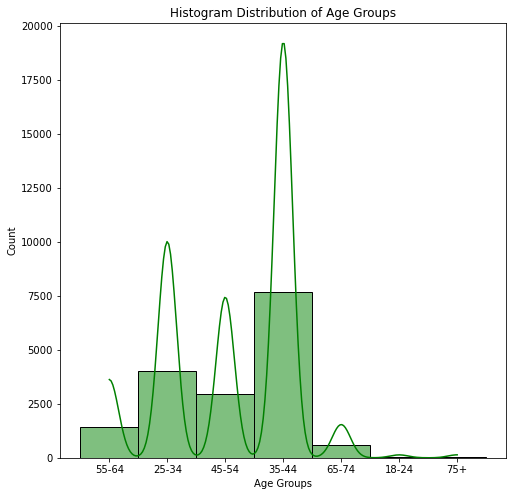

In [29]:
# Determining the skewness and distribution of the data using the age groups of users

plt.figure(figsize=(8,8))
sns.histplot(bikes_clean['Age Groups'].dropna(), bins=5, kde=True, color='green')
plt.title('Histogram Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

From the histogram above, we can observe that the data set is a right skewed data set, with a unimodal distribution of age groups of users of the NYC Citi Bikes. Also, the most frequent users of NYCiti Bike services fall within the 35-44 age group.

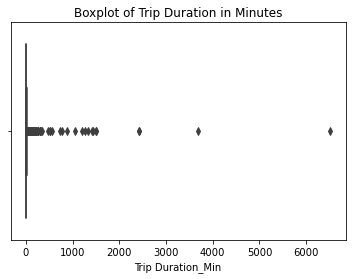

In [30]:
# Using a box plot to show the outliers in the dataset
sns.boxplot(x=bikes_clean["Trip Duration_Min"])
plt.title("Boxplot of Trip Duration in Minutes")
plt.show()

From the plot above, an outlier is observed after 6000 minutes.

In [31]:
# Finding the average trip duration per season
avg_tripduration_season = df.groupby("Season")["Trip Duration_Min"].mean()
avg_tripduration_season = avg_tripduration_season.to_frame()
avg_tripduration_season

,Trip Duration_Min
Season,
Spring,9.719264
Winter,9.473684


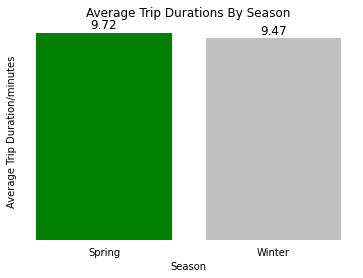

In [32]:
# Displaying the average trip durations per season
for i in range(len(avg_tripduration_season.index)):
    plt.text(i, avg_tripduration_season['Trip Duration_Min'][i]+0.2, round(avg_tripduration_season['Trip Duration_Min'][i],2),
             horizontalalignment = 'center',
             fontdict={'fontsize':12,'fontweight':2},color = 'black')

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)

# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.bar(avg_tripduration_season.index, avg_tripduration_season["Trip Duration_Min"], color=['green','silver'])
plt.title("Average Trip Durations By Season")
plt.xlabel("Season")
plt.ylabel("Average Trip Duration/minutes")
plt.show()

The average trip durations per season are quite similar with a difference of 0.25. This implies a frequent use of Citi Bikes by New Yorkers, no matter the season.

In [33]:
# Finding the average trip duration per weekday
avg_tripduration_weekday = df.groupby("Weekday")["Trip Duration_Min"].mean()
avg_tripduration_weekday = avg_tripduration_weekday.to_frame()
avg_tripduration_weekday

,Trip Duration_Min
Weekday,
Friday,13.278073
Monday,9.715360
Saturday,12.808925
Sunday,10.814696
Thursday,7.390789
Tuesday,7.351626
Wednesday,8.201454


In [34]:
# Sorting trip durations in ascending order
avg_tripduration_weekday.sort_values(by="Trip Duration_Min", inplace =True)
avg_tripduration_weekday

,Trip Duration_Min
Weekday,
Tuesday,7.351626
Thursday,7.390789
Wednesday,8.201454
Monday,9.715360
Sunday,10.814696
Saturday,12.808925
Friday,13.278073


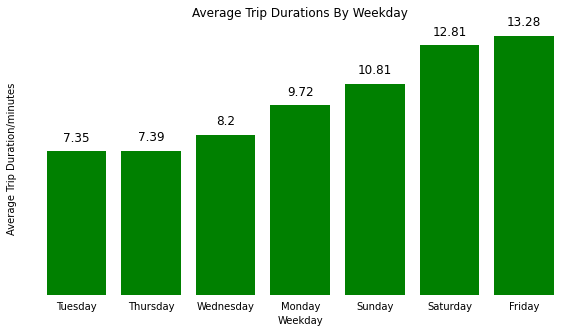

In [51]:
# Displaying the average trip durations per weekday
plt.figure(figsize=(10,5))
for i in range(len(avg_tripduration_weekday.index)):
    plt.text(i, avg_tripduration_weekday['Trip Duration_Min'][i]+0.5, round(avg_tripduration_weekday['Trip Duration_Min'][i],2),
             horizontalalignment = 'center',
             fontdict={'fontsize':12,'fontweight':1},color = 'black')

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)

# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
          
plt.bar(avg_tripduration_weekday.index, avg_tripduration_weekday["Trip Duration_Min"], color='green')
plt.title("Average Trip Durations By Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Trip Duration/minutes")
plt.show()

From the chart above, the highest average trip durations are taken on Fridays. This observation is feasible since Fridays are the last of the weekdays and are usually noted for travels.

In [36]:
# Finding the average age per user type
avg_age_usertype = df.groupby("User Type")["Age"].mean()
avg_age_usertype = avg_age_usertype.to_frame()
avg_age_usertype

,Age
User Type,
One-time user,36.965409
Subscriber,41.787741


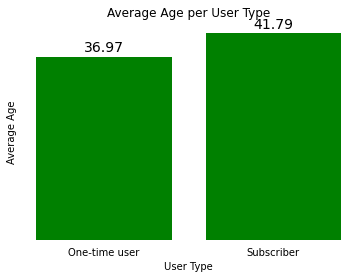

In [37]:
# Displaying the average age per user type
for i in range(len(avg_age_usertype.index)):
    plt.text(i, avg_age_usertype['Age'][i]+1, round(avg_age_usertype['Age'][i],2),
             horizontalalignment = 'center',
             fontdict={'fontsize':14,'fontweight':2},color = 'black')

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)

# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.bar(avg_age_usertype.index, avg_age_usertype["Age"], color='green')
plt.title("Average Age per User Type")
plt.xlabel("User Type")
plt.ylabel("Average Age")
plt.show()

The average ages per user type as displayed above shows younger users prefer the one-time option, while slightly older users may prefer the subscriber option.

In [38]:
# Finding the most popular pick up locations
location= df['Start Station Name'].value_counts().sort_values()
location_counts = location.reset_index()
location_counts.columns = ['Location', 'Count']
location_counts.sort_values(by="Count", ascending =False)
location_counts

,Location,Count
0,Bethune Center,2
1,Bayside Park,3
2,Mlk Light Rail,11
3,Danforth Light Rail,15
4,Union St,24
5,Columbia Park,25
6,West Side Light Rail,31
7,Communipaw & Berry Lane,42
8,Njcu,43
9,Leonard Gordon Park,44


In [39]:
top5= location_counts.iloc[45:50, :]
top5

,Location,Count
45,Morris Canal,710
46,Hamilton Park,1069
47,Sip Ave,1084
48,Exchange Place,1225
49,Grove St Path,2115


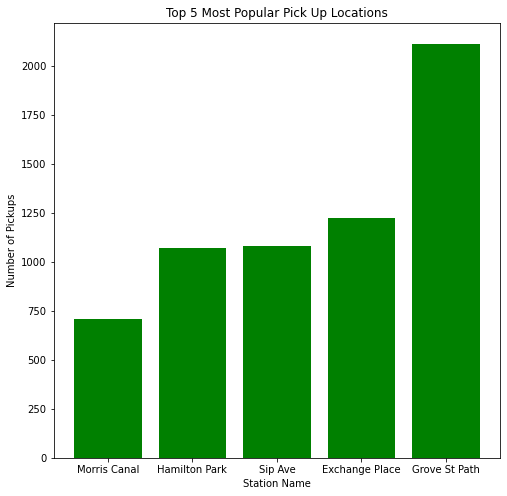

In [40]:
# Displaying the top 5 most popular pick up locations 
plt.figure(figsize=(8,8))    
plt.bar(top5['Location'], top5['Count'], color='green')
plt.title("Top 5 Most Popular Pick Up Locations")
plt.xlabel("Station Name")
plt.ylabel("Number of Pickups")
plt.show()


The top 5 pickup locations for Citi Bike users are Morris Canal, Hamilton Park, Sip Ave, Exchane place and Grove St Path. The most popular among these five is the Grove St Path with the highest total number of pickups.

In [41]:
# Finding the birth year distributions across all users
birth_year= df['Birth Year'].value_counts().sort_index()
birth_year_counts = birth_year.reset_index()
birth_year_counts.columns = ['Birth Year', 'Count']
birth_year_counts

,Birth Year,Count
0,1931,37
1,1941,17
2,1946,1
3,1947,5
4,1948,9
5,1949,28
6,1950,11
7,1951,5
8,1952,17
9,1953,7


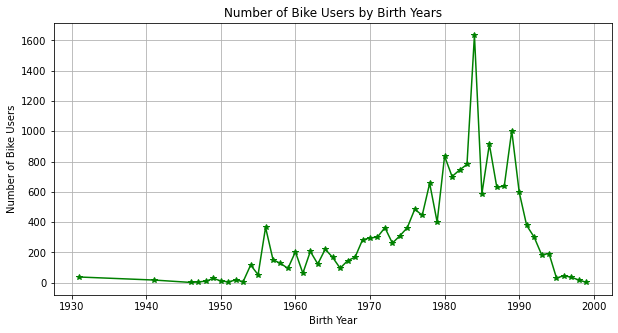

In [42]:
# Displaying the birth years in a line chart

plt.figure(figsize=(10,5))
plt.plot(birth_year_counts['Birth Year'], birth_year_counts['Count'], marker ='*', linestyle='-', color='green')
plt.title('Number of Bike Users by Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Number of Bike Users')
plt.grid(True)
plt.show()

The highest number of bike users are recorded betwwen 1980 and 1990, according to the chart above.

In [43]:
# Determining the correlation in the dataset
bikes_clean.corr()

,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Trip Duration_Min,Month,Temperature
Start Station ID,1.000000,-0.097415,-0.000500,0.011944,-0.011944,-0.019808,-0.019829,-0.005897,-0.007682
End Station ID,-0.097415,1.000000,-0.010497,0.028103,-0.028103,0.005410,0.005396,-0.005522,0.003400
Bike ID,-0.000500,-0.010497,1.000000,0.030232,-0.030232,-0.002314,-0.002328,0.129434,0.145646
Birth Year,0.011944,0.028103,0.030232,1.000000,-1.000000,0.003595,0.003576,0.017319,0.000140
Age,-0.011944,-0.028103,-0.030232,-1.000000,1.000000,-0.003595,-0.003576,-0.017319,-0.000140
Trip Duration,-0.019808,0.005410,-0.002314,0.003595,-0.003595,1.000000,0.999992,0.004396,-0.003029
Trip Duration_Min,-0.019829,0.005396,-0.002328,0.003576,-0.003576,0.999992,1.000000,0.004362,-0.003033
Month,-0.005897,-0.005522,0.129434,0.017319,-0.017319,0.004396,0.004362,1.000000,0.630268
Temperature,-0.007682,0.003400,0.145646,0.000140,-0.000140,-0.003029,-0.003033,0.630268,1.000000


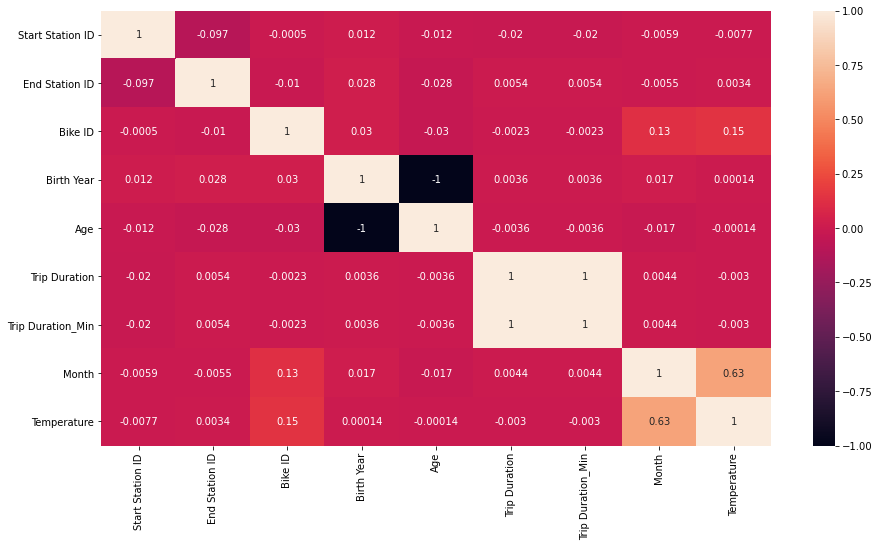

In [44]:
# Displaying the correlations on a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bikes_clean.corr(), annot=True)
plt.show()